In [375]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [376]:
bronx_csv = './BoroughDemo.csv'
df = pd.read_csv(bronx_csv)
df.columns

Index(['Borough', 'TotalPopulationEstimate', 'Male', 'Female', 'Under 5 years',
       '5 to 9 years', '10 to 14 years', '15 to 19 years', '20 to 24 years',
       '25 to 34years', '35 to 44 years', '45 to 54 years', '55 to 59 years',
       '60 to 64 years', '65 to 74 years', '65 to 74 years.1',
       '85 years and over', 'Median age (years)', 'White', 'African American',
       'Asian', 'American Indian', 'Native Hawaiian', ' Some other race alone',
       'Two or More races', 'Hispanic(Total)', 'Mexican', 'Puerto Rican',
       'Cuban', 'Other Hispanic or Latino'],
      dtype='object')

In [377]:
df.head()

Borough TotalPopulationEstimate       Male     Female Under 5 years  \
0           Bronx               1,436,785    676,440    760,345       107,454   
1        Brooklyn               2,606,852  1,234,959  1,371,893       193,851   
2       Manhattan               1,634,989    773,232    861,757        82,024   
3          Queens               2,310,011  1,120,010  1,190,001       144,634   
4  Statten Island                 473,324    229,095    244,229        27,420   

  5 to 9 years 10 to 14 years 15 to 19 years 20 to 24 years 25 to 34years  \
0      100,908         98,242        103,133        121,897       221,024   
1      166,770        154,230        150,044        188,262       468,927   
2       62,937         59,514         72,486        120,405       370,713   
3      127,945        123,991        124,342        158,136       375,623   
4       29,083         30,516         29,923         32,042        61,464   

            ...               Asian American Indian Native Hawaiian  \
0           ...              51,371           3,083             508   
1           ...             302,044           4,004             721   
2           ...             190,648           2,089             704   
3           ...             568,871           4,987             872   
4           ...              37,579             563             197   

   Some other race alone Two or More races Hispanic(Total)  Mexican  \
0                 14,392             9,653         796,193   81,238   
1                 10,312            43,368         506,102  101,761   
2                  6,739            35,677         423,526   42,343   
3                 47,002            50,337         647,005   95,620   
4                  1,555             7,403          85,119   18,641   

   Puerto Rican   Cuban Other Hispanic or Latino  
0       289,790   7,936                  417,229  
1       166,031   7,801                  230,509  
2       109,831  12,020                  259,332  
3       113,413  11,560                  426,412  
4        39,631   1,928                   24,919  

[5 rows x 30 columns]

In [378]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 30 columns):
Borough                     5 non-null object
TotalPopulationEstimate     5 non-null object
Male                        5 non-null object
Female                      5 non-null object
Under 5 years               5 non-null object
5 to 9 years                5 non-null object
10 to 14 years              5 non-null object
15 to 19 years              5 non-null object
20 to 24 years              5 non-null object
25 to 34years               5 non-null object
35 to 44 years              5 non-null object
45 to 54 years              5 non-null object
55 to 59 years              5 non-null object
60 to 64 years              5 non-null object
65 to 74 years              5 non-null object
65 to 74 years.1            5 non-null object
85 years and over           5 non-null object
Median age (years)          5 non-null int64
White                       5 non-null object
African American          

In [383]:
columns = list(df.columns)
columns.pop(0)
GenderColumns = list(df.columns[2:4])
EthColumns = list(df.columns[18:26])
print(EthColumns)

['White', 'African American', 'Asian', 'American Indian', 'Native Hawaiian', ' Some other race alone', 'Two or More races', 'Hispanic(Total)']


In [380]:
df[columns]=df[columns].replace({',':''},regex=True).apply(pd.to_numeric,1)

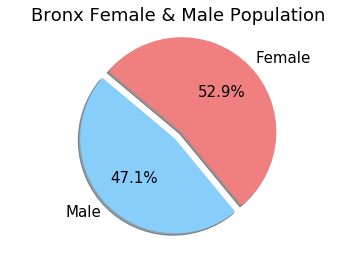

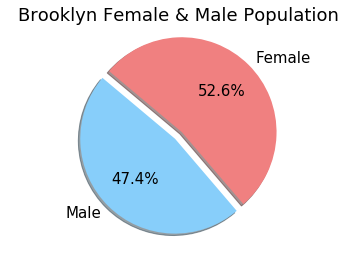

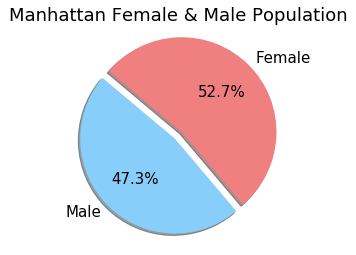

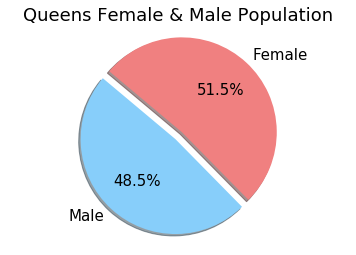

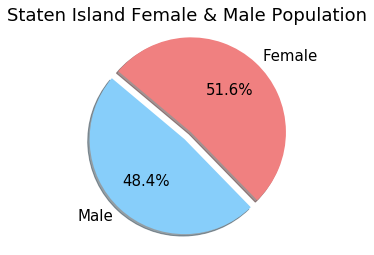

In [381]:
def pieChartGender(x,name ):
    # x refers to Borough 
    labels = GenderColumns[:]
    sizes = df.at[x,'Male'],df.at[x,'Female']
    colors = ['lightskyblue', 'lightcoral']
    explode = (0.1, 0)  # explode 1st slice
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
    autopct='%1.1f%%', shadow=True, startangle=140)

    plt.axis('equal')
    plt.title(name +' Female & Male Population')
    plt.show()
pieChartGender(0,"Bronx")
pieChartGender(1,"Brooklyn")
pieChartGender(2,"Manhattan")
pieChartGender(3,"Queens")
pieChartGender(4,"Staten Island")

<Figure size 432x288 with 0 Axes>

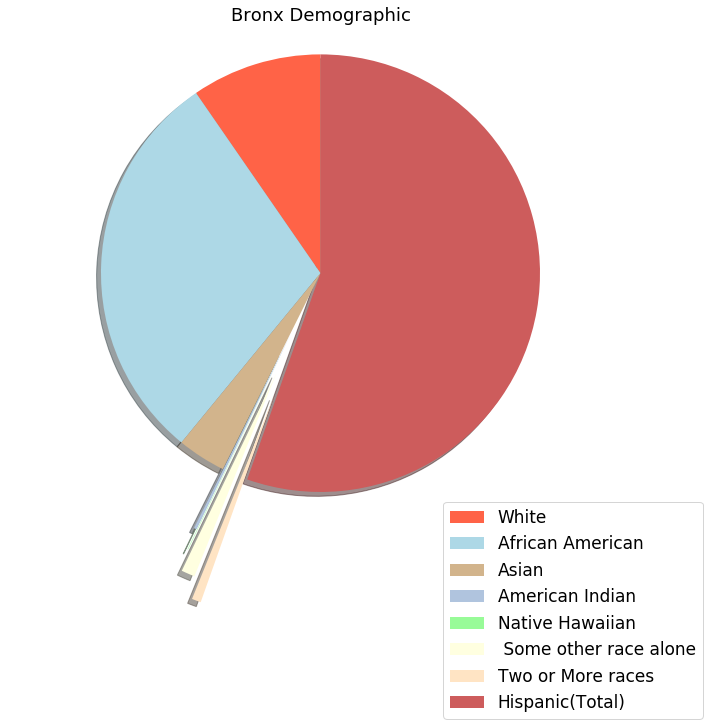

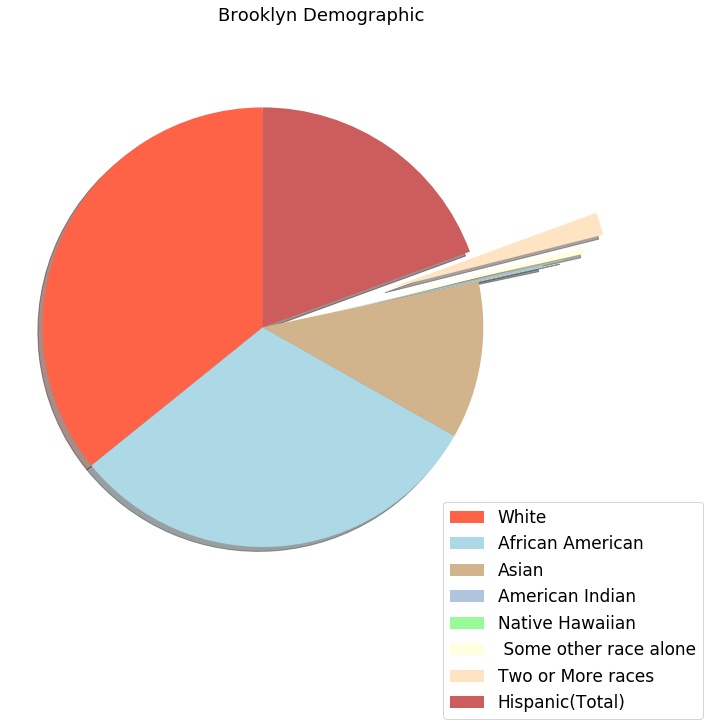

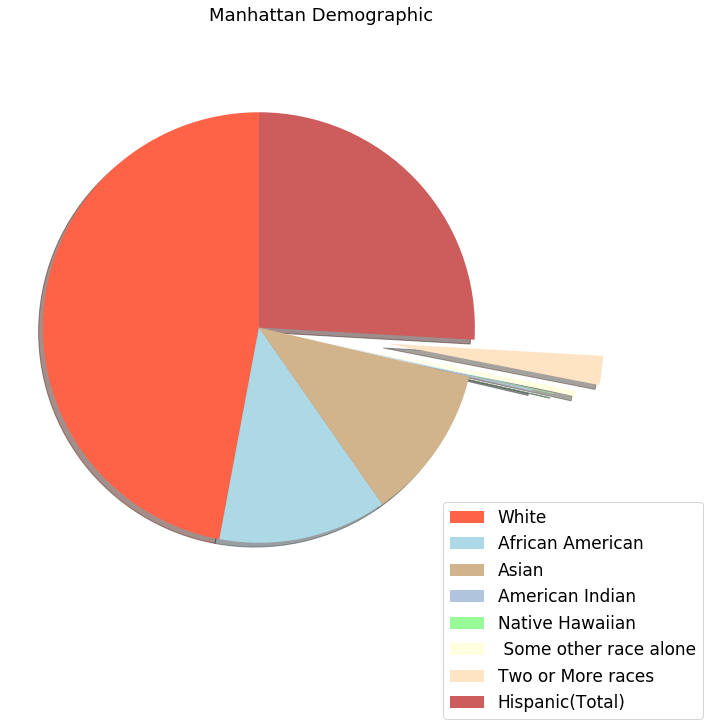

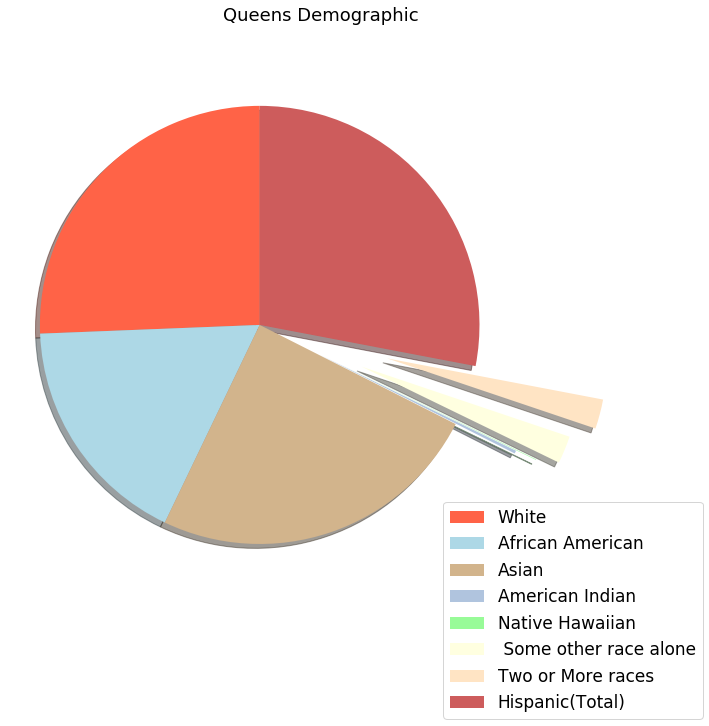

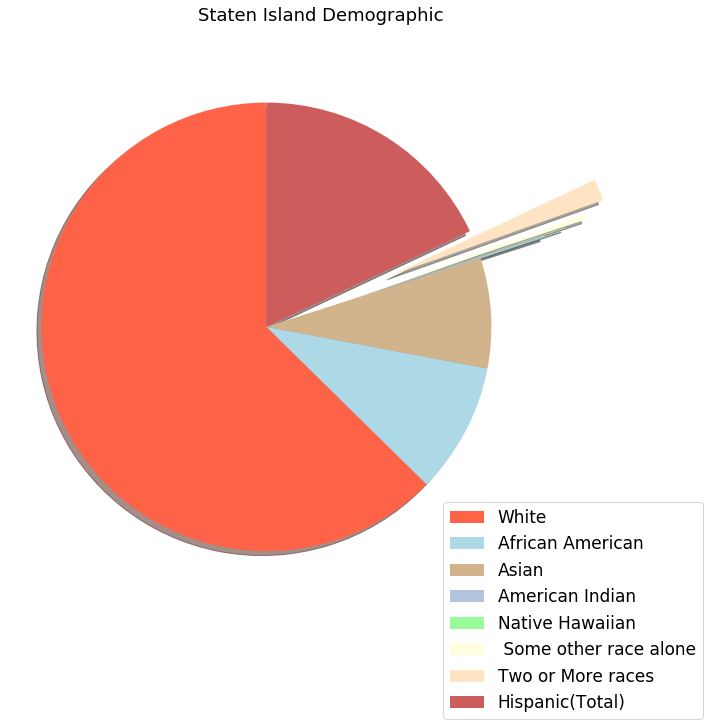

In [443]:
import random
import matplotlib.colors as mcolors
from matplotlib.pyplot import figure

def pieChartDemographic(y,name ):
    # Data to plot
    figure(figsize=(10,10))
    labels = EthColumns[:]
    sizes = df.at[y,'White'],df.at[y,'African American'],df.at[y,'Asian'],df.at[y,'American Indian'],df.at[y,'Native Hawaiian'], df.at[y,' Some other race alone'], df.at[y,'Two or More races'],df.at[y,'Hispanic(Total)']
    colors = 'tomato','lightblue','tan','lightsteelblue','palegreen','lightyellow','bisque','indianred'
    explode = 0,0,0,.3,.4,.5,.6,0
    plt.gca().axis("equal")
    patches, texts= plt.pie(sizes, colors=colors,explode=explode, shadow=True, startangle=90)
    plt.legend(patches,labels, bbox_to_anchor=(1,0), loc="lower right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure,prop={'size': 17})
    plt.axis('equal')
    plt.tight_layout()
    plt.title(name + " Demographic")
plt.figure(0)
pieChartDemographic(0, "Bronx")
plt.figure(1)
pieChartDemographic(1, "Brooklyn")
plt.figure(2)
pieChartDemographic(2, "Manhattan")
plt.figure(3)
pieChartDemographic(3, "Queens")
plt.figure(4)
pieChartDemographic(4, "Staten Island")